In [1]:
import pandas as pd
import numpy as np
from data.Functions import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [12]:
dataset = pd.read_csv('data/ml_gw_car_insurance.csv')

In [14]:
data = lorenzo_preprocessor(dataset)
# data.drop(['Unnamed: 0','policy_id'], axis=1, inplace=True)
data.to_csv('./data/processed_data.csv')
data

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque_Nm,torque_rpm,power_bhp,power_rpm
0,-0.230283,-0.186591,1.341085,-1.915921,-0.783513,-0.671712,-1.237709,-1.457229,-1.201594,0.185212,...,-1.187895,-0.783393,-1.620622,0.078956,-1.266548,0.0,-1.017669,-0.045700,-1.394156,0.755743
1,0.148188,-0.928914,-0.756854,-0.299191,0.462975,-0.671712,-1.237709,-1.457229,-1.201594,0.185212,...,-1.187895,-0.783393,-1.620622,0.078956,-1.266548,0.0,-1.017669,-0.045700,-1.394156,0.755743
2,0.555022,-0.928914,-0.652872,0.288711,-0.835268,-0.671712,-1.237709,-1.457229,-1.201594,0.185212,...,-1.187895,-0.783393,-1.620622,0.078956,-1.266548,0.0,-1.017669,-0.045700,-1.394156,0.755743
3,0.697883,0.853783,-0.166667,0.435686,0.158275,-0.671712,0.677613,-0.518945,1.193337,-1.304672,...,0.841825,1.276499,0.617047,0.078956,0.172752,0.0,-0.293143,1.194047,0.343811,0.755743
4,-0.035840,0.853783,1.286469,0.582662,0.900969,0.207812,-1.237709,-0.206184,1.193337,-2.049614,...,-1.187895,1.276499,0.617047,0.078956,0.172752,0.0,-0.593890,0.987423,-0.430223,0.210345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,-0.618508,1.111232,1.341085,1.023588,-0.568111,0.207812,-1.237709,-0.206184,1.193337,-2.049614,...,-1.187895,1.276499,0.617047,0.078956,0.172752,0.0,-0.593890,0.987423,-0.430223,0.210345
58588,1.420720,-0.928914,0.550328,-1.181044,-0.625076,-0.671712,-1.237709,-1.457229,-1.201594,0.185212,...,-1.187895,-0.783393,-1.620622,0.078956,-1.266548,0.0,-1.017669,-0.045700,-1.394156,0.755743
58589,1.330490,-0.186591,0.010811,0.582662,0.900969,-0.671712,-1.237709,-1.457229,-1.201594,0.185212,...,-1.187895,-0.783393,-1.620622,0.078956,-1.266548,0.0,-1.017669,-0.045700,-1.394156,0.755743
58590,1.509251,1.230262,0.815371,1.023588,-0.568111,-0.671712,0.039172,0.732100,1.193337,0.930154,...,0.841825,1.276499,0.617047,0.078956,0.172752,0.0,-0.293143,1.194047,0.343811,0.755743


In [4]:

X = data.drop(['is_claim'],axis=1)# Features
y = data.is_claim # Target variable
features=X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=16,shuffle=False)

# instantiate the model (using the default parameters)
logreg =RandomForestClassifier(n_estimators=500, random_state=42)

# fit the model with data
clf=logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=clf.feature_importances_.T
df.sort_values(by='coefficients',ascending=False)


,Feature,coefficients
0,policy_tenure,0.475032
2,age_of_policyholder,0.263098
1,age_of_car,0.153321
4,population_density,0.051032
3,area_cluster,0.049592
7,model,0.000628
25,height,0.000567
23,length,0.000496
26,gross_weight,0.000437
17,displacement,0.000395


In [5]:
y_df = pd.DataFrame(y_test)
distribution = y_df.value_counts()
distribution

is_claim
0.0         10977
1.0           742
dtype: int64

Accuracy: 0.93
Recall: 0.00
Precision: 0.03
              precision    recall  f1-score   support

     refused       0.94      0.99      0.96     10977
    accepted       0.03      0.00      0.00       742

    accuracy                           0.93     11719
   macro avg       0.49      0.50      0.48     11719
weighted avg       0.88      0.93      0.90     11719



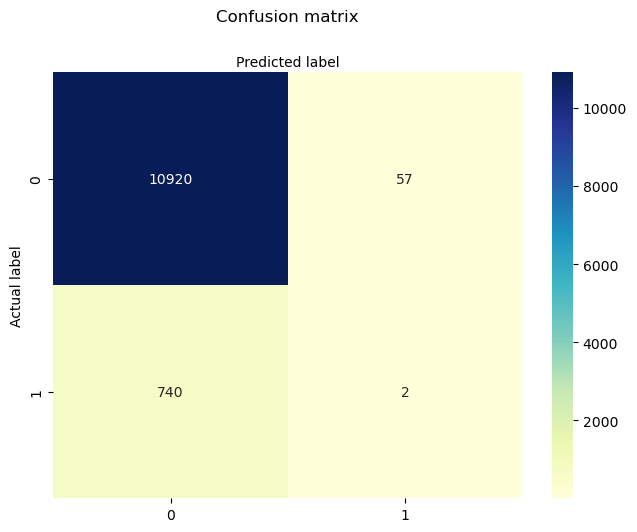

In [6]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
# Evaluate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

Optimal threshold: 0.03


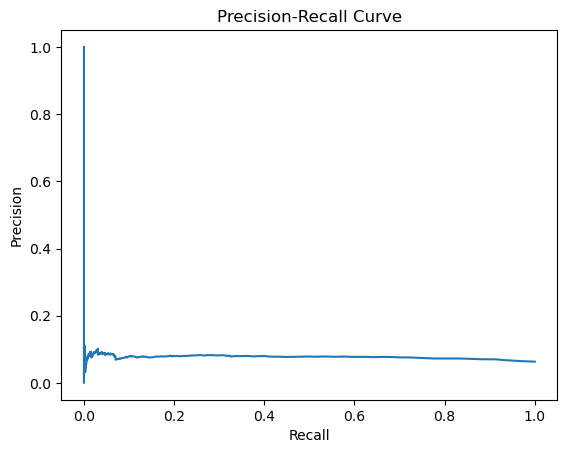

In [7]:
y_scores = logreg.predict_proba(X_test)[:, 1]
from sklearn.metrics import precision_recall_curve, f1_score

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate the F1 score for each threshold
f1_scores = [f1_score(y_test, (y_scores >= t).astype(int)) for t in thresholds]

# Find the threshold that maximizes the F1 score
optimal_threshold = thresholds[np.argmax(f1_scores)]

print(f'Optimal threshold: {optimal_threshold:.2f}')


# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Accuracy: 0.54
Recall: 0.58
Precision: 0.08
              precision    recall  f1-score   support

     refused       0.95      0.54      0.69     10977
    accepted       0.08      0.58      0.14       742

    accuracy                           0.54     11719
   macro avg       0.51      0.56      0.41     11719
weighted avg       0.89      0.54      0.65     11719



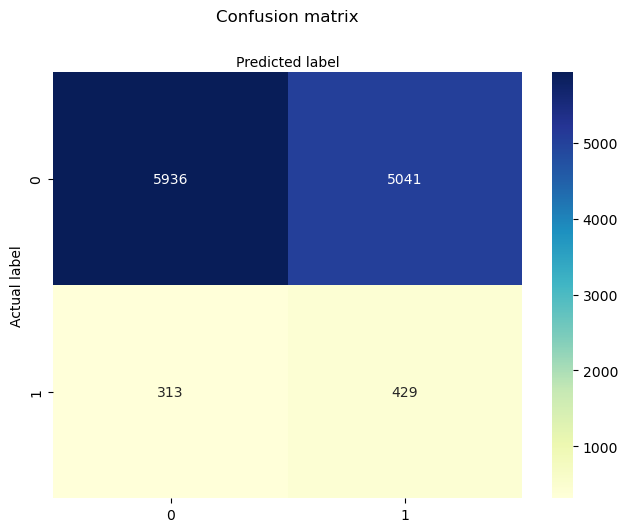

In [8]:
threshold = 0.04

predicted_proba = logreg.predict_proba(X_test)
y_pred = (predicted_proba [:,1] >= threshold).astype('int')

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
# Evaluate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))


# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

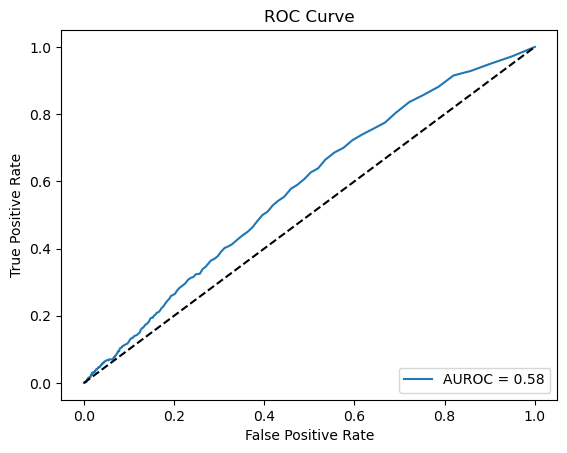

In [9]:
from sklearn.metrics import roc_curve, auc
y_scores = logreg.predict_proba(X_test)[:, 1]
# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Calculate the AUROC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='AUROC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [10]:
# Calculate the confusion matrix for each threshold
cms = [confusion_matrix(y_test, (y_scores >= t).astype(int)) for t in thresholds]

# Calculate sensitivity and specificity for each threshold
sensitivity = [cm[1, 1] / (cm[1, 1] + cm[1, 0]) for cm in cms]
specificity = [cm[0, 0] / (cm[0, 0] + cm[0, 1]) for cm in cms]

# Calculate balanced accuracy for each threshold
balanced_accuracy = [(s + sp) / 2 for s, sp in zip(sensitivity, specificity)]

# Find the threshold that maximizes balanced accuracy
optimal_threshold = thresholds[np.argmax(balanced_accuracy)]

print(f'Optimal threshold: {optimal_threshold:.2f}')

Optimal threshold: 0.03


Accuracy: 0.48
Recall: 0.66
Precision: 0.08
              precision    recall  f1-score   support

     refused       0.95      0.46      0.62     10977
    accepted       0.08      0.66      0.14       742

    accuracy                           0.48     11719
   macro avg       0.52      0.56      0.38     11719
weighted avg       0.90      0.48      0.59     11719



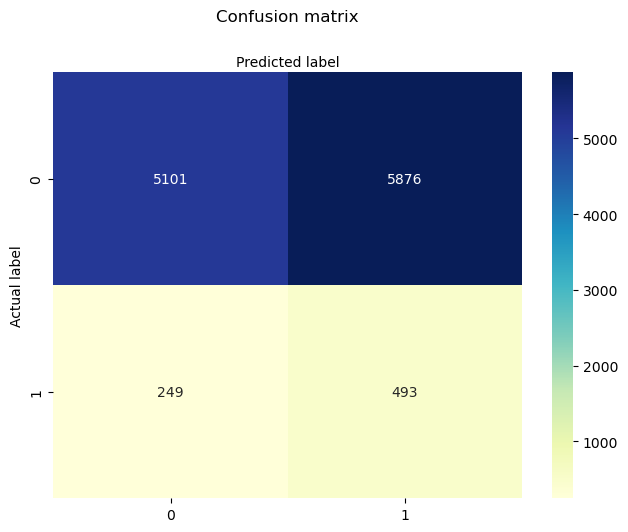

In [11]:
threshold = 0.03

predicted_proba = logreg.predict_proba(X_test)
y_pred = (predicted_proba [:,1] >= threshold).astype('int')

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
# Evaluate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))